<a href="https://colab.research.google.com/github/kimdfarm/2025-1-myclass-BDA/blob/main/inclass/09w_B_wed_0430_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09주차 수업

## 결측값 제거하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.DataFrame({'sex':['M','F',np.nan , 'M','F'], 'score':[5,4,3,4,np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [4]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [5]:
df.dropna(axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [6]:
df.dropna(axis=1)

""
0
1
2
3
4


In [8]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [7]:
df.dropna(subset=['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [13]:
df.dropna(axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [14]:
df.dropna(subset=['score'] , axis=1)

KeyError: ['score']

In [18]:
df_romiss = df.dropna(subset=['score'])
df_romiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [19]:
df_romiss['score']+1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [20]:
df_romiss = df.dropna(subset=['score' , 'sex'])
df_romiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [21]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [22]:
df.score.mean()

np.float64(4.0)

In [23]:
df['score'].sum()

np.float64(16.0)

In [29]:
df.groupby('sex').agg(
    mean_score=('score', 'mean'),
    sum_score=('score', 'sum')
)

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [31]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [32]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [33]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [34]:
df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [35]:
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [36]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [37]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [38]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [39]:
df.dropna(thresh=1)

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [42]:
df.dropna(thresh=3)

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [43]:
df.dropna(subset=['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [44]:
df.dropna(subset=[ 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [45]:
df.dropna(subset=['born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


## 빈 데이터프레임 확인 방법 df.empty

In [46]:
df1 = pd.DataFrame(index=['row1','row2','row3'])
df1

""
row1
row2
row3


In [48]:
df1.empty

True

In [49]:
df2 = pd.DataFrame(columns=['col1','col2','col3'])
df2

,col1,col2,col3


In [50]:
df2.empty

True

In [51]:
df3 = pd.DataFrame(index=['row1','row2','row3'],columns=['col1','col2','col3'])
df3

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [52]:
df3.empty

False

In [54]:
df3 = pd.DataFrame(np.nan , index=['row1','row2','row3'],columns=['col1','col2','col3'])
df3

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [58]:
df3.empty

False

In [59]:
df3 = pd.DataFrame(2 , index=['row1','row2','row3'],columns=['col1','col2','col3'])
df3

,col1,col2,col3
row1,2,2,2
row2,2,2,2
row3,2,2,2


In [60]:
df3.empty

False

## 결측 값 대체

In [61]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 4.52 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [65]:
exam = pd.read_csv('data/exam.csv')
exam.loc[[2,7,14],['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [66]:
exam.loc[[2,7,14],['math']]

,math
2,NaN
7,NaN
14,NaN


In [69]:
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


## 결측값 채워넣기 fillna()

In [75]:
exam['math'] = exam['math'].fillna(100)
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [76]:
exam.loc[[2,7,14],['math']] = np.nan
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [79]:
exam['math'] = exam['math'].fillna(exam['math'].mean())
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,55.235294,86,78
7,8,2,55.235294,78,25
14,15,4,55.235294,56,78


In [80]:
pd.set_option('display.precision' , 2)
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,55.24,86,78
7,8,2,55.24,78,25
14,15,4,55.24,56,78


In [81]:
exam.math.isna().sum()

np.int64(0)

In [82]:
df = pd.DataFrame({'sex':[1,2,1,3,2,1], 'score':[5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [83]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [85]:
df['sex'].value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [87]:
df['score'].value_counts()

,count
score,
4,2
5,1
3,1
2,1
6,1


In [88]:
df['score'].value_counts().sort_index()

,count
score,
2,1
3,1
4,2
5,1
6,1


In [89]:
df['sex']= np.where(df['sex']==3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [90]:
df['score']= np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [91]:
df.groupby('sex').agg(
    mean_score=('score', 'mean'),
)
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [92]:
df.dropna(subset=['sex','score'])

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
4,2.0,2.0


In [93]:
df.dropna(subset=['sex','score']).groupby('sex').agg(
    mean_score=('score', 'mean'),
)

,mean_score
sex,
1.0,4.0
2.0,3.0


In [94]:
df = pd.DataFrame([1])
df

,0
0,1


In [98]:
df = pd.DataFrame([1,1,2,2])
df

,0
0,1
1,1
2,2
3,2


In [99]:
df = pd.DataFrame([[1,1,2,2]])
df

,0,1,2,3
0,1,1,2,2


In [102]:
df = pd.DataFrame({'x1' :[1,1,2,2]})
df['x2'] = np.where(df['x1'] == 1 , 10, np.nan)
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [103]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [108]:
df = pd.DataFrame({'x1' :[1,1,2,2]})
df['x2'] = np.where(df['x1'] == 1 , 'a' , np.nan)
df

DTypePromotionError: The DType <class 'numpy.dtypes.StrDType'> could not be promoted by <class 'numpy.dtypes._PyFloatDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

In [109]:
df = pd.DataFrame({'x1' :[1,1,2,2]})
df['x2'] = np.where(df['x1'] == 1 , 'a', None)
df

,x1,x2
0,1,a
1,1,a
2,2,None
3,2,None


In [110]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      2 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [112]:
df = pd.DataFrame({'x1' :[1,1,2,2]})
df['x2'] = np.where(df['x1'] == 1 , 'a','etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [113]:
df['x2'] = df['x2'].replace('etc',np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [114]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [115]:
df = df.fillna(10)
df

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [117]:
type(df.loc[2,'x2'])

int

In [119]:
type(df.loc[0,'x2'])

str

## 이상값(outlier) 알아보기

In [121]:
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
92,ford,mustang,4.0,2008,6,manual(m5),r,17,26,r,subcompact
91,ford,mustang,3.8,1999,6,auto(l4),r,18,25,r,subcompact
47,dodge,caravan 2wd,4.0,2008,6,auto(l6),f,16,23,r,minivan
44,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,22,r,minivan
147,nissan,maxima,3.0,1999,6,auto(l4),f,18,26,r,midsize


In [122]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [124]:
%config InlineBackend.figure_format = 'retina'

<Axes: ylabel='hwy'>

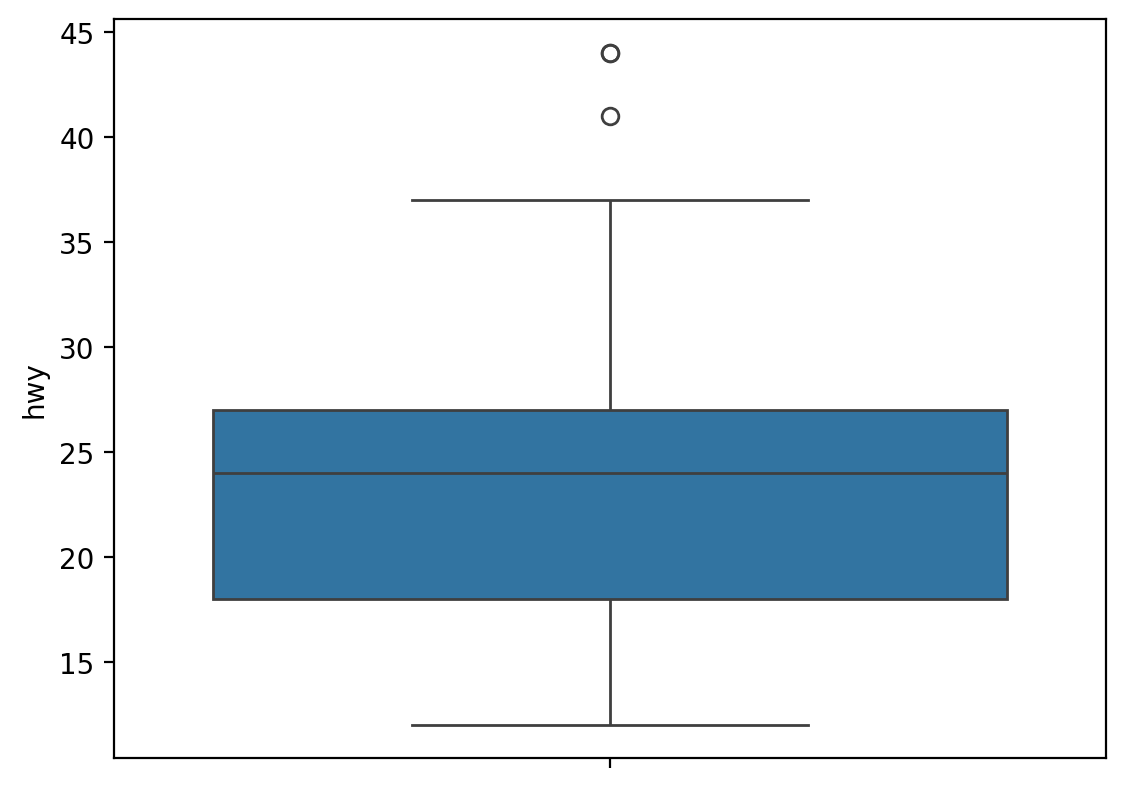

In [125]:
import seaborn as sns            # 위 두개는 outlier
sns.boxplot(data=mpg  ,y = 'hwy') # 25% ~ 75% 차이 1.5배 기준 (IQR)

In [126]:
s = pd.Series([1,2,3,4,5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [129]:
s.quantile([.1,.2,.25,.5,.75])

,0
0.10,1.4
0.20,1.8
0.25,2.0
0.50,3.0
0.75,4.0


In [131]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [133]:
mpg.hwy.quantile([.25,.5,.75])

,hwy
0.25,18.0
0.50,24.0
0.75,27.0


In [134]:
a,b = [10,20]

In [135]:
a

10

In [136]:
b

20

In [137]:
p25, p50 , p75 = mpg.hwy.quantile([.25,.5,.75])

In [138]:
p25

18.0

In [139]:
p50

24.0

In [140]:
p75

27.0

In [142]:
iqr = p75-p25
iqr

9.0

In [151]:
## upper fence
uf = p75 + 1.5*iqr
uf

40.5

In [152]:
## lower fence
lf = iqr - 1.5*iqr
lf

-4.5

In [145]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [146]:
mpg.hwy.describe()['50%']

np.float64(24.0)

In [154]:
mpg[mpg.hwy > uf]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [155]:
mpg[mpg.hwy < lf]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [156]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [157]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0
